# ＭＡＣＤ指標

## 程式實作：取得或計算日ＭＡＣＤ指標

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

#### 讀取看盤軟體匯出資料

In [2]:
##### 使用2018年6月22日到2018年9月17日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day16(1).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10','DIF12-26','MACD9','OSC'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','DIF12-26','MACD9','OSC']) 

# 保存MACD指標
df_macd = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將MACD指標的Columns的名稱由中文改為英文
df_macd = df_macd.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將MACD指標的Date設為Index
df_macd.set_index(df_macd['Date'],inplace=True)
df_macd = df_macd.drop(columns=['Date'])

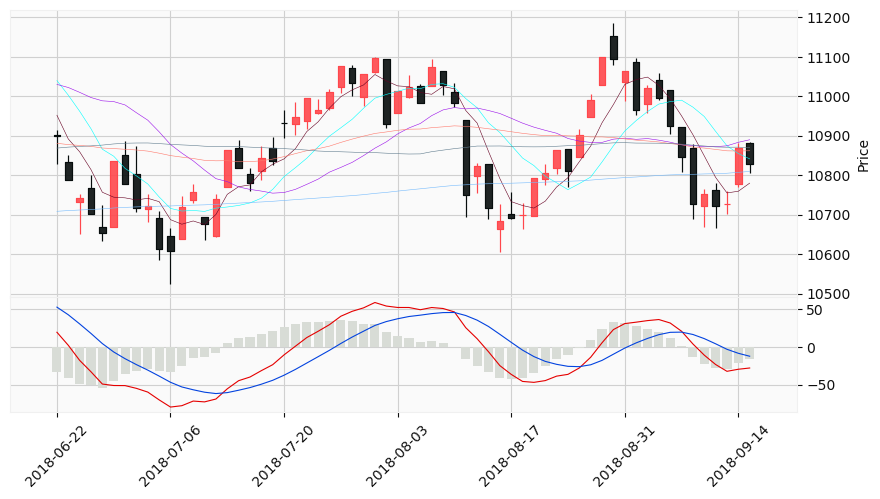

In [3]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與MACD指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue'),
    'OSC': mpf.make_addplot(df_macd['OSC'],type='bar',panel=1,secondary_y=False,color='xkcd:light grey'),
    'DIF12-26': mpf.make_addplot(df_macd['DIF12-26'],width=0.8,panel=1,secondary_y=False,color='xkcd:red'),
    'MACD9': mpf.make_addplot(df_macd['MACD9'],width=0.8,panel=1,secondary_y=False,color='xkcd:blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 使用talib套件計算ＭＡＣＤ指標

In [4]:
from talib.abstract import *

# 當使用talib Abstract API時，DataFrame欄位名稱需為小寫
# 請參考書籍：Python：量化交易 Ta-Lib 技術指標 139個活用技巧
df_k_line_talib = df_k_line.copy()
df_k_line_talib.columns=[ i.lower() for i in df_k_line_talib.columns]

In [5]:
talib_macd = MACD(df_k_line_talib, fastperiod=12, slowperiod=26, signalperiod=9)

* talib套件計算ＭＡＣＤ指標格式
  - macd ： DIF
  - macdsignal ： MACD
  - macdhist ： OSC

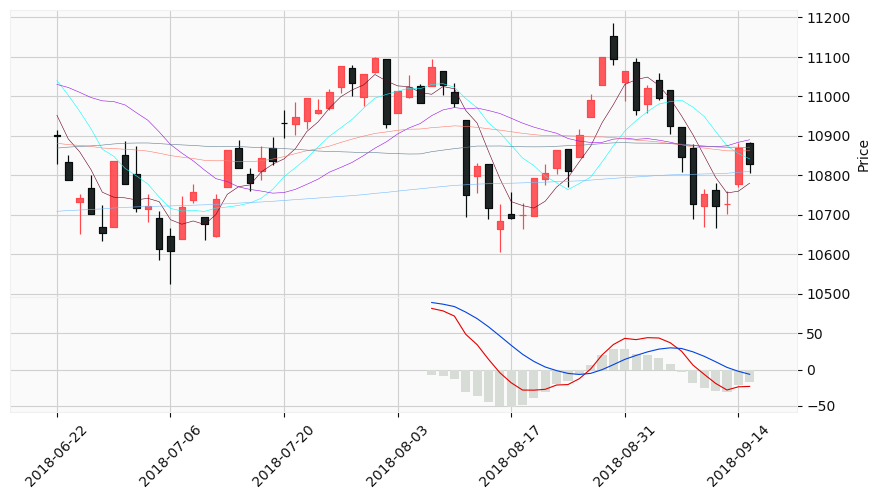

In [6]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與MACD指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue'),
    'OSC': mpf.make_addplot(talib_macd['macdhist'],type='bar',panel=1,secondary_y=False,color='xkcd:light grey'),
    'DIF12-26': mpf.make_addplot(talib_macd['macd'],width=0.8,panel=1,secondary_y=False,color='xkcd:red'),
    'MACD9': mpf.make_addplot(talib_macd['macdsignal'],width=0.8,panel=1,secondary_y=False,color='xkcd:blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

## 程式實作：ＭＡＣＤ指標黃金交叉與死亡交叉

#### 柱狀體

In [7]:
##### 使用2017年1月10日到2017年7月24日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day16(2).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10','DIF12-26','MACD9','OSC'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','DIF12-26','MACD9','OSC']) 

# 保存MACD指標
df_macd = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將MACD指標的Columns的名稱由中文改為英文
df_macd = df_macd.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將MACD指標的Date設為Index
df_macd.set_index(df_macd['Date'],inplace=True)
df_macd = df_macd.drop(columns=['Date'])

In [8]:
# 尋找黃金交叉：OSC由負值翻為正值
golden_points_len = len(np.array(df_macd['OSC']))
golden_points = np.array([np.nan]*golden_points_len)
for idx in range(1,golden_points_len) :
    if df_macd.iloc[idx-1]['OSC'] < 0 and  df_macd.iloc[idx]['OSC'] >= 0 :
        golden_points[idx] = df_macd.iloc[idx]['OSC']

# 尋找死亡交叉：OSC由正值翻為負值
death_points_len = len(np.array(df_macd['OSC']))
death_points = np.array([np.nan]*death_points_len)
for idx in range(1,death_points_len) :
    if df_macd.iloc[idx-1]['OSC'] > 0 and  df_macd.iloc[idx]['OSC'] <= 0 :
        death_points[idx] = df_macd.iloc[idx]['OSC']

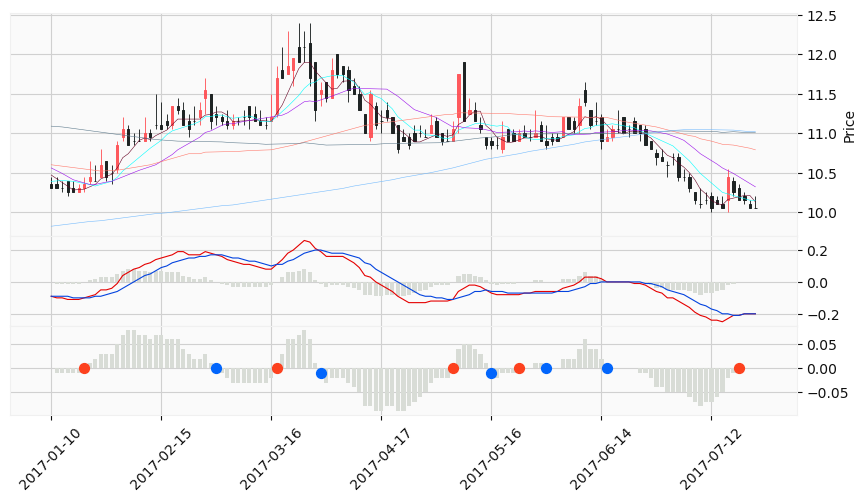

In [9]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與MACD指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue'),
    'OSC1': mpf.make_addplot(df_macd['OSC'],type='bar',panel=1,secondary_y=False,color='xkcd:light grey'),
    'DIF12-26': mpf.make_addplot(df_macd['DIF12-26'],width=0.8,panel=1,secondary_y=False,color='xkcd:red'),
    'MACD9': mpf.make_addplot(df_macd['MACD9'],width=0.8,panel=1,secondary_y=False,color='xkcd:blue'),
    'OSC2': mpf.make_addplot(df_macd['OSC'],type='bar',panel=2,secondary_y=False,color='xkcd:light grey'),
    'Golden': mpf.make_addplot(golden_points,panel=2,type='scatter',marker='o',markersize=50,color='xkcd:orange red'),
    'Death': mpf.make_addplot(death_points,panel=2,type='scatter',marker='o',markersize=50,color='xkcd:bright blue') 
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 雙線

In [10]:
# 黃金交叉
def crossover(over,down):
    a1 = over
    b1 = down
    a2 = a1.shift(1)
    b2 = b1.shift(1)
    crossover =  (a1>a2) & (a1>=b1) & (b2>a2)
    return crossover
# 死亡交叉
def crossunder(down,over):
    a1 = down
    b1 = over
    a2 = a1.shift(1)
    b2 = b1.shift(1)
    crossdown =  (a1<a2) & (a1<=b1) & (b2<a2)
    return crossdown

In [11]:
##### 使用2017年7月7日到2017年7月24日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day16(3).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10','DIF12-26','MACD9','OSC'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','DIF12-26','MACD9','OSC']) 

# 保存MACD指標
df_macd = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將MACD指標的Columns的名稱由中文改為英文
df_macd = df_macd.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將MACD指標的Date設為Index
df_macd.set_index(df_macd['Date'],inplace=True)
df_macd = df_macd.drop(columns=['Date'])

In [12]:
# 尋找黃金交叉
ret_over=crossover(df_macd['DIF12-26'],df_macd['MACD9'])
golden_points_len = len(np.array(df_macd['MACD9']))
golden_points = np.array([np.nan]*golden_points_len)
for idx in range(0,len(ret_over)) :
    if ret_over[idx] :
        golden_points[idx] = df_macd['MACD9'][idx]

# 尋找死亡交叉
ret_under=crossunder(df_macd['DIF12-26'],df_macd['MACD9'])
death_points_len = len(np.array(df_macd['MACD9']))
death_points = np.array([np.nan]*death_points_len)
for idx in range(0,len(ret_under)) :
    if ret_under[idx] :
        death_points[idx] = df_macd['MACD9'][idx]

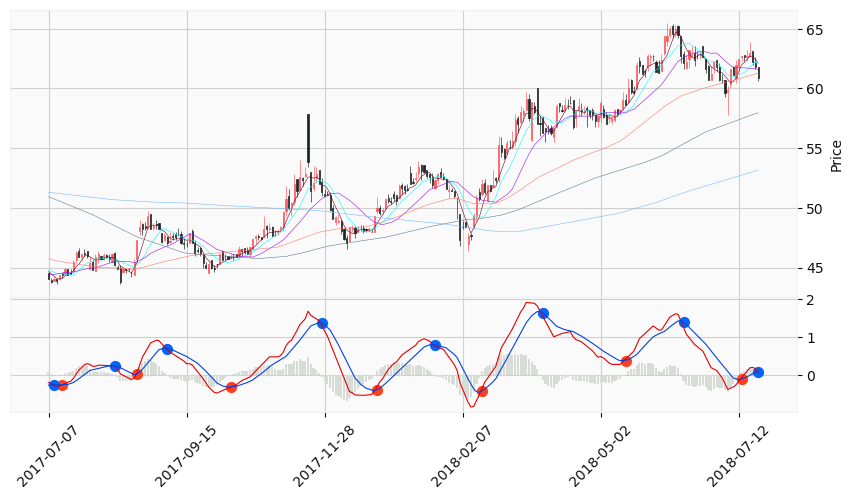

In [13]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與MACD指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue'),
    'OSC': mpf.make_addplot(df_macd['OSC'],type='bar',panel=1,secondary_y=False,color='xkcd:light grey'),
    'DIF12-26': mpf.make_addplot(df_macd['DIF12-26'],width=0.8,panel=1,secondary_y=False,color='xkcd:red'),
    'MACD9': mpf.make_addplot(df_macd['MACD9'],width=0.8,panel=1,secondary_y=False,color='xkcd:blue'),
    'Golden': mpf.make_addplot(golden_points,panel=1,secondary_y=False,type='scatter',marker='o',markersize=50,color='xkcd:orange red'),
    'Death': mpf.make_addplot(death_points,panel=1,secondary_y=False,type='scatter',marker='o',markersize=50,color='xkcd:bright blue') 
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

## 程式實作：標示ＭＡＣＤ指標的背離 

### 高檔背離(DIF)

In [14]:
##### 使用2018年3月19日到2018年9月14日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day16(4).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10','DIF12-26','MACD9','OSC'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','DIF12-26','MACD9','OSC']) 

# 保存MACD指標
df_macd = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將MACD指標的Columns的名稱由中文改為英文
df_macd = df_macd.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將MACD指標的Date設為Index
df_macd.set_index(df_macd['Date'],inplace=True)
df_macd = df_macd.drop(columns=['Date'])

In [15]:
import myutils

# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'high_low',order=5)

# 人工方式設定轉折點
turning_point_line_start_date = max_min.loc[57]['Date'].strftime('%Y-%m-%d')
turning_point_line_start_price =  max_min.loc[57]['Price']
turning_point_line_end_date = max_min.loc[72]['Date'].strftime('%Y-%m-%d')
turning_point_line_end_price =  max_min.loc[72]['Price']

In [16]:
from scipy.signal import argrelextrema

# 計算DIF轉折點(高點對高點)
macd_dif = np.array(df_macd['DIF12-26'])
local_max_idx = argrelextrema(macd_dif,np.greater,order=5)[0]
local_max_idx = np.array(local_max_idx)

# 人工方式設定DIF轉折點
dif_turning_point_line_x = [local_max_idx[3],local_max_idx[4]]
dif_turning_point_line_y = [df_macd['DIF12-26'].iloc[dif_turning_point_line_x[0]],df_macd['DIF12-26'].iloc[dif_turning_point_line_x[1]]]
slope,intercept = np.polyfit(dif_turning_point_line_x,dif_turning_point_line_y,1)
dif_turning_point_line_len = len(np.array(df_macd['DIF12-26']))
dif_turning_point_line = np.array([np.nan]*dif_turning_point_line_len)
for idx in range(0,dif_turning_point_line_len) :
    if idx >= dif_turning_point_line_x[0] and idx <= dif_turning_point_line_x[1] :
        dif_turning_point_line[idx] = slope * idx + intercept

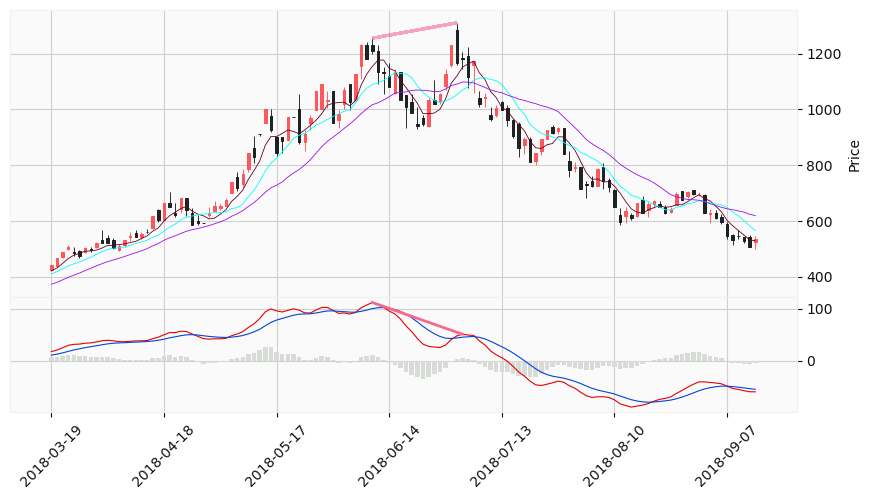

In [17]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定兩點相連的線
seq_of_seq_of_points=[
    [(turning_point_line_start_date,turning_point_line_start_price),(turning_point_line_end_date,turning_point_line_end_price)]
                     ]

# 設定移動平均線與MACD指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.6,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet'), 
    'OSC': mpf.make_addplot(df_macd['OSC'],type='bar',panel=1,secondary_y=False,color='xkcd:light grey'),
    'DIF12-26': mpf.make_addplot(df_macd['DIF12-26'],width=0.8,panel=1,secondary_y=False,color='xkcd:red'),
    'MACD9': mpf.make_addplot(df_macd['MACD9'],width=0.8,panel=1,secondary_y=False,color='xkcd:blue'),
    'DIFTURN': mpf.make_addplot(dif_turning_point_line,width=2.0,panel=1,color='xkcd:rosy pink')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1.8, colors='xkcd:rosy pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

### 低檔背離(柱狀體)  

In [18]:
##### 使用2015年11月10日到2016年2月24日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day16(5).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10','DIF12-26','MACD9','OSC'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','DIF12-26','MACD9','OSC']) 

# 保存MACD指標
df_macd = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將MACD指標的Columns的名稱由中文改為英文
df_macd = df_macd.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將MACD指標的Date設為Index
df_macd.set_index(df_macd['Date'],inplace=True)
df_macd = df_macd.drop(columns=['Date'])

In [19]:
# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'high_low',order=5)

# 人工方式設定轉折點
turning_point_line_start_date = max_min.loc[24]['Date'].strftime('%Y-%m-%d')
turning_point_line_start_price =  max_min.loc[24]['Price']
turning_point_line_end_date = max_min.loc[47]['Date'].strftime('%Y-%m-%d')
turning_point_line_end_price =  max_min.loc[47]['Price']

print(turning_point_line_start_date,turning_point_line_start_price,turning_point_line_end_date,turning_point_line_end_price)

2015-12-14 124.5 2016-01-15 104.0


In [20]:
# 計算OSC轉折點(低點對低點)
macd_osc = np.array(df_macd['OSC'])
local_min_idx = argrelextrema(macd_osc,np.less,order=5)[0]
local_min_idx = np.array(local_min_idx)

print(local_min_idx)

# 人工方式設定OSC轉折點
osc_turning_point_line_x = [local_min_idx[1],local_min_idx[2]]
osc_turning_point_line_y = [df_macd['OSC'].iloc[osc_turning_point_line_x[0]],df_macd['OSC'].iloc[osc_turning_point_line_x[1]]]
slope,intercept = np.polyfit(osc_turning_point_line_x,osc_turning_point_line_y,1)
osc_turning_point_line_len = len(np.array(df_macd['OSC']))
osc_turning_point_line = np.array([np.nan]*osc_turning_point_line_len)
for idx in range(0,osc_turning_point_line_len) :
    if idx >= osc_turning_point_line_x[0] and idx <= osc_turning_point_line_x[1] :
        osc_turning_point_line[idx] = slope * idx + intercept

[ 4 24 47 64]


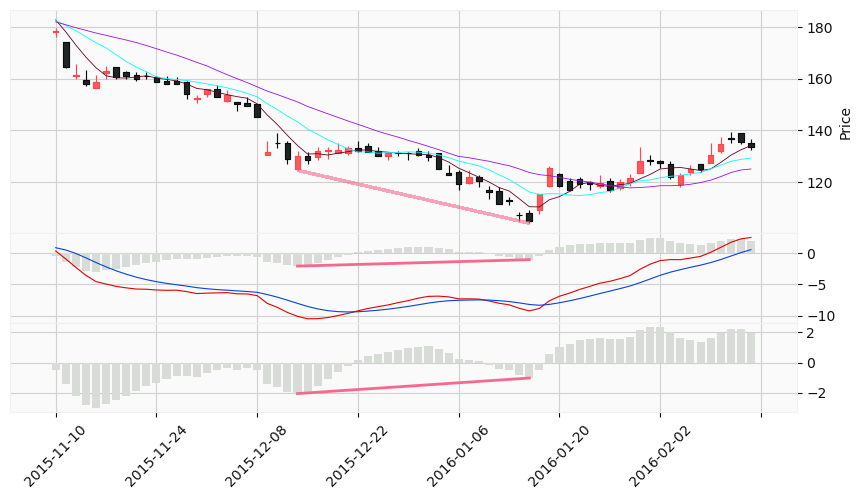

In [21]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定兩點相連的線
seq_of_seq_of_points=[
    [(turning_point_line_start_date,turning_point_line_start_price),(turning_point_line_end_date,turning_point_line_end_price)]
                     ]

# 設定移動平均線與MACD指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.6,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet'), 
    'OSC1': mpf.make_addplot(df_macd['OSC'],type='bar',panel=1,secondary_y=False,color='xkcd:light grey'),
    'DIF12-26': mpf.make_addplot(df_macd['DIF12-26'],width=0.8,panel=1,secondary_y=False,color='xkcd:red'),
    'MACD9': mpf.make_addplot(df_macd['MACD9'],width=0.8,panel=1,secondary_y=False,color='xkcd:blue'),
    'OSCTURN1': mpf.make_addplot(osc_turning_point_line,width=2.0,panel=1,color='xkcd:rosy pink'),
    'OSC2': mpf.make_addplot(df_macd['OSC'],type='bar',panel=2,secondary_y=False,color='xkcd:light grey'),
    'OSCTURN2': mpf.make_addplot(osc_turning_point_line,width=2.0,panel=2,color='xkcd:rosy pink')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1.8, colors='xkcd:rosy pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)